In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import ast

# Loading the cleaned dataset
try:
    df = pd.read_csv('cleaned_data.csv')
    print('The Data is loaded successfully')
except FileNotFoundError:
    raise FileNotFoundError('Error: cleaned_data.csv not found. Check the file path for it.')

# Extract 'Brand' from the 'details' dictionary
def extract_brand(detail):
    try:
        parsed = ast.literal_eval(detail) if isinstance(detail, str) else detail
        return parsed.get('Brand', 'Unknown')
    except Exception:
        return 'Unknown'

df['brand'] = df['details'].apply(extract_brand)


# Set visualization style
sns.set(style="whitegrid")


C:\Users\student\AppData\Local\Temp\ipykernel_6272\545465145.py:9: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_data.csv')


The Data is loaded successfully


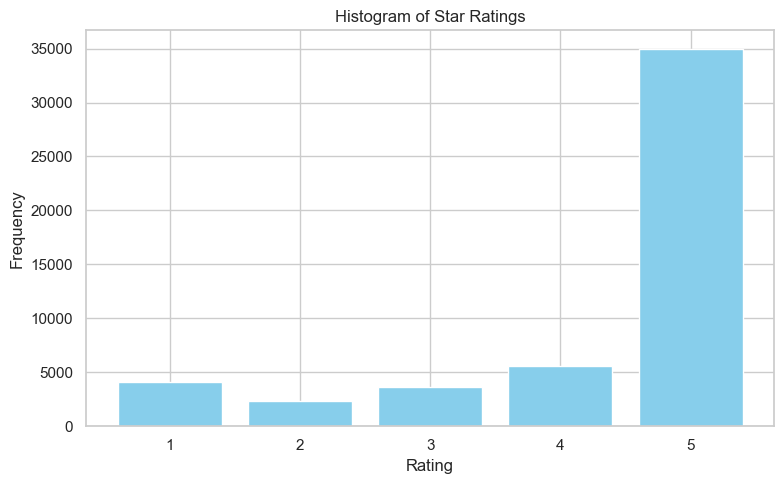

In [3]:
# Star Rating Histogram
plt.figure(figsize=(8, 5))
df['rating'].plot(kind='hist', bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], rwidth=0.8, color='skyblue')
plt.title("Histogram of Star Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Star Rating Distribution

This histogram displays the frequency of different star ratings given by customers.

**Insights gathered:**
- **5-star ratings dominate the dataset**, indicating that customers generally report high satisfaction with their purchases.
- Ratings of 4, 3, and 1 also appear with reasonable frequency, but much lower than 5-star ratings.
- **2-star ratings are the least common**, suggesting either that dissatisfied customers leave fewer reviews or that moderate dissatisfaction is less frequently reported.

This distribution is heavily skewed towards positive feedback, which might reflect either genuinely good product quality or social desirability bias in review behavior.


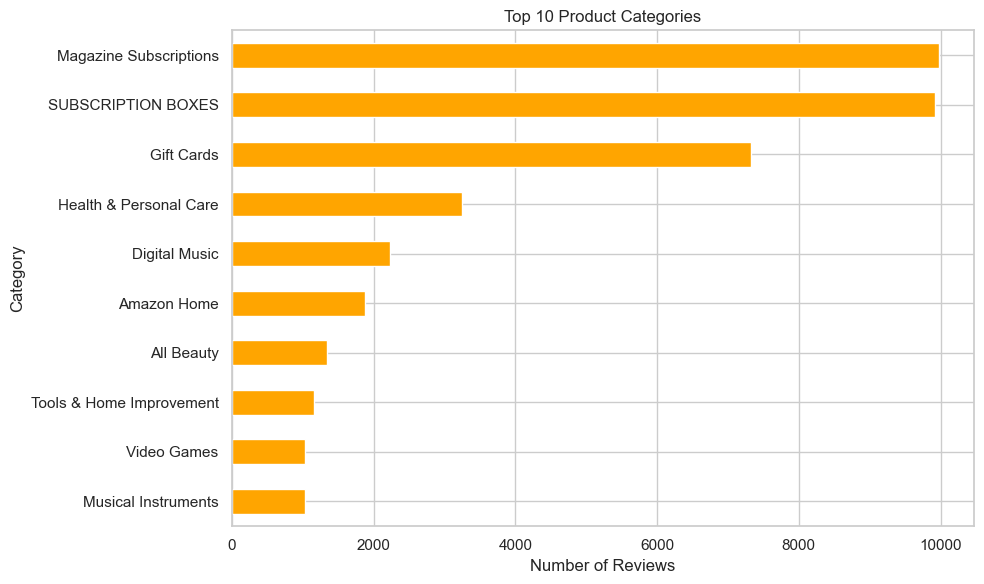

In [14]:
# Review Count
top_categories = df['main_category'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind='barh', color='orange')
plt.title("Top 10 Product Categories")
plt.xlabel("Number of Reviews")
plt.ylabel("Category")
plt.tight_layout()
plt.gca().invert_yaxis()  
plt.show()


### Top 10 Product Categories by Review Count

This horizontal bar chart displays the top 10 most reviewed product categories in the dataset. Categories like **Magazine Subscriptions**, **Subscription Boxes**, and **Gift Cards** dominate the review volume, each garnering thousands of user interactions.

#### Key Insights here:
- **Magazine Subscriptions** and **Subscription Boxes** are tied for the highest number of reviews, suggesting these categories are highly engaging or frequently purchased.
- **Gift Cards** also appear popular, possibly due to their frequent use as gifts across seasons.
- There is a steep drop-off in review count after the top 3 categories, indicating a more niche or limited appeal for categories such as **Musical Instruments** and **Video Games**.
- The review distribution helps identify where user activity is concentrated and which categories may need more marketing or analysis attention.



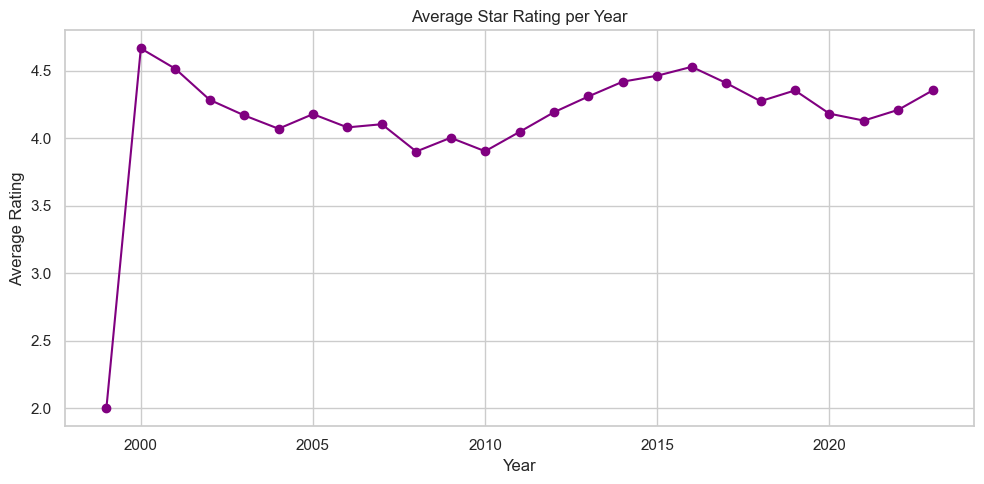

In [5]:
# Average Rating per Year (Line Chart)
yearly_avg = df.groupby('year')['rating'].mean()
plt.figure(figsize=(10, 5))
yearly_avg.plot(marker='o', color='purple')
plt.title("Average Star Rating per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

### Average Star Rating per Year

This line chart illustrates the trend of average star ratings from customer reviews over the years.

- The overall trend shows that the average rating consistently stays above 4.0, indicating a general tendency toward positive customer feedback.
- There is a sharp anomaly around 1999–2000, likely due to a small sample size or data artifact from earlier records.
- From 2001 to around 2010, ratings gradually decline, suggesting either increasing customer expectations or more critical reviews.
- Post-2010, there is a noticeable recovery and stabilization in ratings, hovering around 4.3–4.5.
- This recovery may reflect improved product quality, better customer service practices, or selection bias where satisfied customers are more likely to leave reviews.

This insight supports the presence of overall customer satisfaction but also highlights historical shifts that may be worth deeper exploration.


In [6]:
# Pearson Correlation: Review Length vs Rating
corr_value, p_value = pearsonr(df['review_length'], df['rating'])
print(f" Pearson Correlation (review length vs rating): {corr_value:.4f} (p = {p_value:.4e})")

 Pearson Correlation (review length vs rating): -0.1167 (p = 1.4735e-152)


### Pearson Correlation: Review Length vs Rating

To assess the relationship between how long a review is and the rating it gives, we calculated the Pearson correlation coefficient.

- **Correlation coefficient**: -0.1167  
- **p-value**: ~1.47e-152

#### Interpretation:
- The negative coefficient indicates a slight inverse relationship — as review length increases, ratings tend to decrease marginally.
- However, the correlation is very weak (close to 0), suggesting **no practically significant linear relationship** between review length and rating.
- The extremely low p-value indicates that this result is statistically significant, but due to the large dataset size, **statistical significance doesn't imply meaningful correlation**.

This insight suggests that customers’ tendency to write longer reviews isn’t strongly associated with whether they rate a product higher or lower.


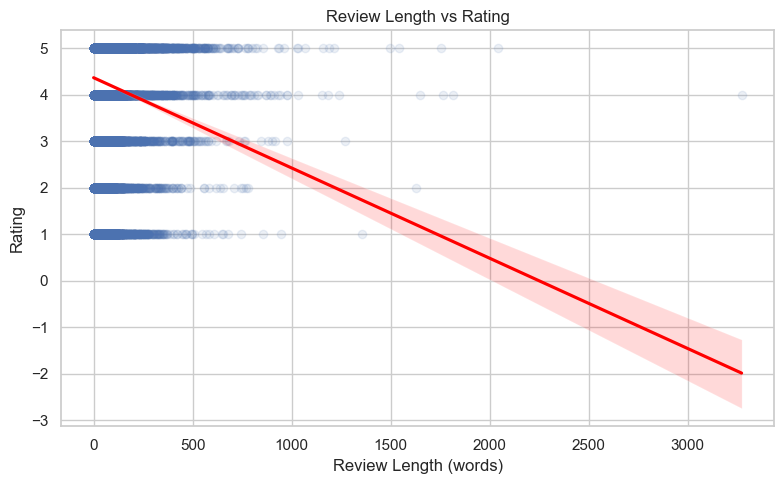

In [7]:
# Optional: Scatter plot to visualize relationship
plt.figure(figsize=(8, 5))
sns.regplot(x='review_length', y='rating', data=df, scatter_kws={'alpha':0.1}, line_kws={"color":"red"})
plt.title("Review Length vs Rating")
plt.xlabel("Review Length (words)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

### Review Length vs Rating

This scatter plot visualizes the relationship between the length of a review (in words) and the corresponding star rating. A red regression line has been added for clarity.

From the plot, we observe a **slightly negative correlation** between review length and rating. This is supported by the Pearson correlation coefficient of approximately **-0.1167**, which indicates a **weak inverse relationship**. In practical terms, longer reviews are *slightly* more likely to be associated with lower ratings.

However, since the relationship is weak, **review length is not a strong predictor of rating**. The wide dispersion and overlap across different rating levels suggest that users may write both short and long reviews regardless of how positively or negatively they feel.

This insight may point to **individual expression styles** rather than consistent behavior across users.

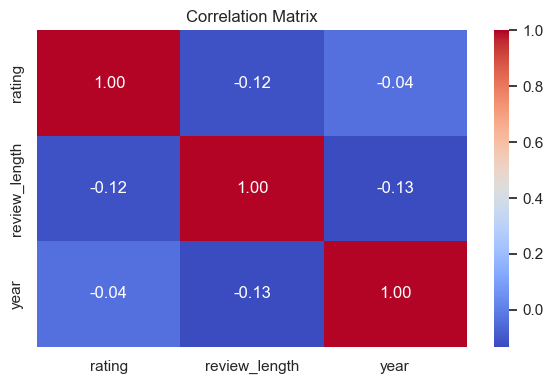

In [8]:
# Correlation Matrix
corr = df[['rating', 'review_length', 'year']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


### Correlation Matrix

The heatmap above visualizes the correlation between key numerical variables: `rating`, `review_length`, and `year`. 

- **Rating vs. Review Length:** A slight negative correlation (-0.12) is observed, suggesting that longer reviews tend to be marginally associated with lower ratings. However, the strength of the relationship is weak and may not be practically significant.
- **Review Length vs. Year:** There is a similarly weak negative correlation (-0.13), indicating that review lengths have slightly decreased over time.
- **Rating vs. Year:** With a correlation of -0.04, there is almost no meaningful linear relationship between the review year and the rating.

These low correlation values imply that none of the selected features are strongly linearly related, and relationships—if any—might be non-linear or driven by other contextual factors.


In [9]:
# Outlier Detection using IQR for review length
Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
iqr_value = Q3 - Q1
lower_bound = Q1 - 1.5 * iqr_value
upper_bound = Q3 + 1.5 * iqr_value
outliers = df[(df['review_length'] < lower_bound) | (df['review_length'] > upper_bound)]
print(f" Outliers in review_length: {len(outliers)}")


 Outliers in review_length: 4506


### Outlier Detection in Review Length

To identify unusually long or short reviews, the Interquartile Range (IQR) method was applied to the `review_length` field.

- **Q1 (25th percentile):** Lower quartile value
- **Q3 (75th percentile):** Upper quartile value
- **IQR:** Q3 - Q1
- **Outliers:** Defined as reviews with lengths below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`

**Result:**  
A total of **4,506 reviews** were identified as outliers in terms of length. These may include spammy, overly brief, or excessively verbose reviews that could distort summary statistics or introduce bias.


In [10]:
# Grouped Summary Statistics for Ratings by Category
category_summary = df.groupby('main_category')['rating'].describe().sort_values(by='count', ascending=False)
print("Detailed Rating Stats per Category:")
display(category_summary.head(10))  


Detailed Rating Stats per Category:


,count,mean,std,min,25%,50%,75%,max
main_category,,,,,,,,
Magazine Subscriptions,9974.0,4.173752,1.339340,1.0,4.0,5.0,5.0,5.0
SUBSCRIPTION BOXES,9929.0,3.783160,1.522400,1.0,3.0,5.0,5.0,5.0
Gift Cards,7333.0,4.803764,0.746753,1.0,5.0,5.0,5.0,5.0
Health & Personal Care,3246.0,4.264325,1.206455,1.0,4.0,5.0,5.0,5.0
Digital Music,2236.0,4.563506,0.965624,1.0,5.0,5.0,5.0,5.0
Amazon Home,1874.0,4.460512,1.106110,1.0,4.0,5.0,5.0,5.0
All Beauty,1346.0,4.152303,1.254220,1.0,4.0,5.0,5.0,5.0
Tools & Home Improvement,1153.0,4.443192,1.108102,1.0,4.0,5.0,5.0,5.0
Video Games,1034.0,4.323017,1.215467,1.0,4.0,5.0,5.0,5.0


### Grouped Summary Statistics: Average Ratings by Product Category

Summary here just provides key descriptive statistics for customer ratings across the most reviewed product categories. 

**Insights gathered here:**
- **Gift Cards** stand out with the highest average rating, indicating strong customer satisfaction.
- **SUBSCRIPTION BOXES** have the **lowest average rating** and **highest standard deviation**, which may suggest inconsistent experiences or unmet expectations.
- Categories like **Digital Music**, **Musical Instruments**, and **Amazon Home** also perform well, with high average ratings and moderate variability.

These statistics help identify not only popular product types but also those with the most favorable and consistent customer sentiment.


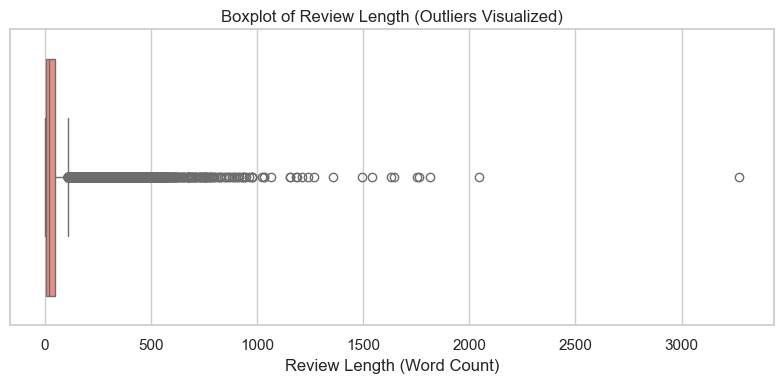

In [11]:
# Boxplot to Visualize Outliers in Review Length
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['review_length'], color='salmon')
plt.title("Boxplot of Review Length (Outliers Visualized)")
plt.xlabel("Review Length (Word Count)")
plt.tight_layout()
plt.show()


### Boxplot of Review Length 

This boxplot provides a clear view of the distribution and spread of review lengths. Most reviews are clustered toward the lower end of the word count scale, indicating that users typically leave brief comments. However, a number of extreme outliers exist—some reviews exceed 3000 words, which is significantly higher than the median and third quartile.

These outliers may represent detailed product experiences or niche cases and can heavily skew statistical analysis. Visualizing them helps in identifying whether to handle them (e.g., remove, cap, or investigate) before further modeling.


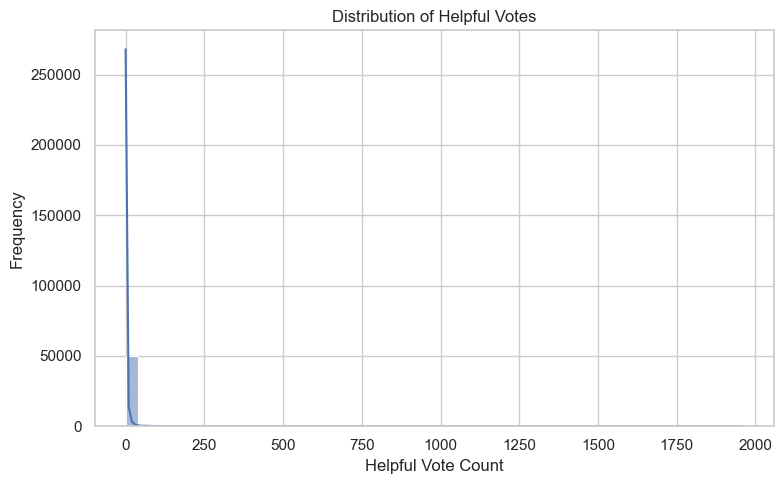

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['helpful_vote'], bins=50, kde=True)
plt.title("Distribution of Helpful Votes")
plt.xlabel("Helpful Vote Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Distribution of Helpful Votes

This histogram displays the frequency distribution of helpful vote counts received by reviews.

**The key Insights here:**
- The distribution is **highly right-skewed**, indicating that the vast majority of reviews receive very few helpful votes.
- A **long tail** of reviews garners higher helpful vote counts, but these are rare.
- The concentration around lower helpful vote values (near 0) suggests that **most customer reviews are not widely interacted with or endorsed**.
- The presence of outliers (very high vote counts) could signal **notable or particularly informative reviews** that resonated with many users.

**Implication:**  
This skewness may impact models that rely on helpfulness as a feature, and **transformations or outlier handling** may be needed before incorporating this variable into predictive analysis.


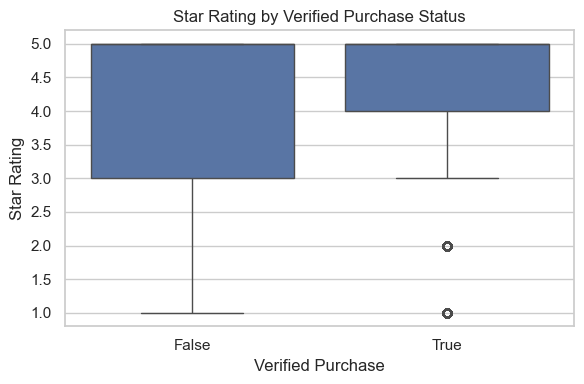

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='verified_purchase', y='rating')
plt.title("Star Rating by Verified Purchase Status")
plt.xlabel("Verified Purchase")
plt.ylabel("Star Rating")
plt.tight_layout()
plt.show()


### Star Rating by Verified Purchase Status

This boxplot compares star ratings based on whether the review came from a verified purchase or not. 

From the visualization, we observe that:
- Reviews from **verified purchases** tend to have a **higher median rating** (around 5 stars) and show **less variability** in their ratings.
- Reviews from **unverified purchases** display a **wider range of ratings**, including more low ratings (as low as 1 star), and a lower median (around 4 stars).

This suggests that verified purchases are generally more positively rated, potentially because they represent genuine customer experiences. In contrast, unverified purchases could include more critical or spammy reviews, contributing to the broader spread and lower ratings.


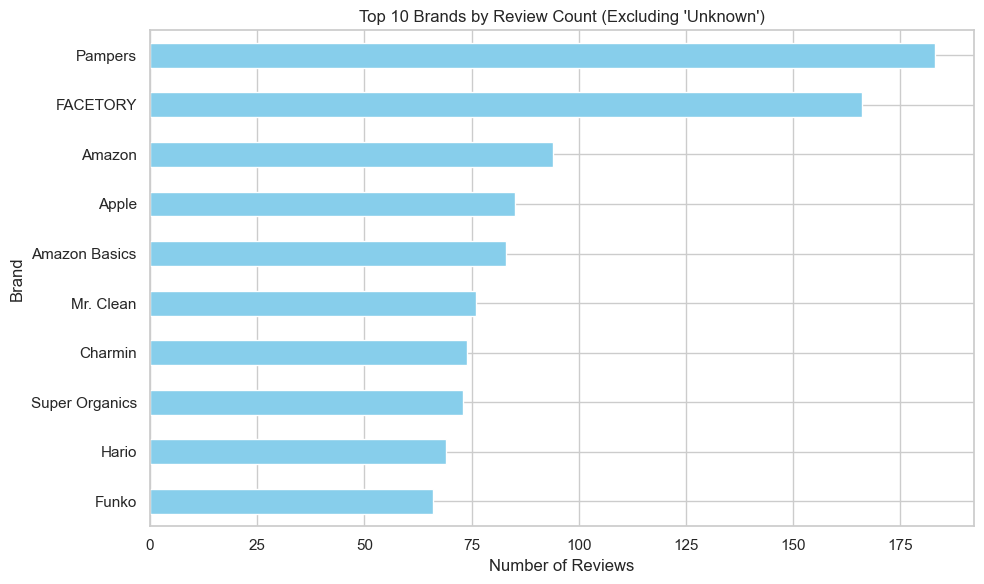

In [15]:
# Top 10 Brands by Review Count (excluding 'Unknown')
top_brands = df[df['brand'].str.lower() != 'unknown']['brand'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_brands.plot(kind='barh', color='skyblue')
plt.title("Top 10 Brands by Review Count (Excluding 'Unknown')")
plt.xlabel("Number of Reviews")
plt.ylabel("Brand")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Top 10 Brands by Review Count (Excluding 'Unknown')

This bar chart visualizes the brands with the highest number of reviews, deliberately excluding entries labeled as `"Unknown"` to ensure cleaner insights. 

**Insights:**
- **Pampers** and **FACETORY** dominate the top two spots, suggesting strong brand presence or popularity in their respective categories.
- **Amazon** and **Apple** also feature prominently, consistent with their broad product reach and customer base.
- The relatively smaller counts for other brands like **Funko**, **Hario**, and **Super Organics** still reflect niche engagement and potential loyal followings.

This visualization helps identify **brand performance trends** in terms of customer interaction, which can be useful for brand-level analysis or modeling.
